In [ ]:
from google.colab import drive 
drive.mount("/content/grieve/")

Drive already mounted at /content/grieve/; to attempt to forcibly remount, call drive.mount("/content/grieve/", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(("/content/grieve/MyDrive/Colab Notebooks/project ml/Sentimental Analysis/Reddit_Data.csv"))

In [ ]:
pd.set_option('display.max_colwidth',100)

In [ ]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them they still stare puzzled from time time like some k...,1
1,buddhism has very much lot compatible with christianity especially considering that sin and suff...,1
2,seriously don say thing first all they won get its too complex explain normal people anyway and ...,-1
3,what you have learned yours and only yours what you want teach different focus the goal not the ...,0
4,for your own benefit you may want read living buddha living christ thich nhat hanh you might fin...,1


In [ ]:
df.category.isnull().sum()
y=df.category

In [ ]:
df1=df.replace([0,1,-1],['Neutral','Positive','Negative'])

In [ ]:
import re
import string
import nltk

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords as s
stop_word=s.words('english')
print(stop_word,end=" ")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
wn=nltk.WordNetLemmatizer()

In [ ]:
def clean_text(text):
  word="".join([c.lower() for c in text if c not in string.punctuation])
  token=re.split("\W+",word)
  word=[wn.lemmatize(word) for word in token if word not in stop_word]
  return word


In [ ]:
df[df['clean_comment'].isnull()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
df1.clean_comment.shape

(37249,)

In [ ]:
df.category.shape

(37249,)

In [ ]:
df.dropna(inplace=True)


In [ ]:
df.shape

(37149, 2)

In [ ]:
y=df.category.replace([-1],[2])
y

0        1
1        1
2        2
3        0
4        1
        ..
37244    0
37245    1
37246    0
37247    1
37248    0
Name: category, Length: 37149, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer=clean_text)


In [ ]:
import pickle
pickle.dump(cv,open('/content/grieve/MyDrive/Colab Notebooks/project ml/Sentimental Analysis/clean_text.pkl','wb'))

In [ ]:
x=cv.fit(df.clean_comment)

In [ ]:
print(x.vocabulary_,end=" ")

{'': 0, 'family': 16117, 'mormon': 28353, 'never': 29626, 'tried': 44125, 'explain': 15804, 'still': 41332, 'stare': 41147, 'puzzled': 34777, 'time': 43534, 'like': 25493, 'kind': 24216, 'strange': 41443, 'creature': 11148, 'nonetheless': 29980, 'come': 9933, 'admire': 2572, 'patience': 32033, 'calmness': 8082, 'equanimity': 15244, 'acceptance': 2260, 'compassion': 10091, 'developed': 12825, 'thing': 43308, 'buddhism': 7691, 'teach': 42808, 'much': 28529, 'lot': 25895, 'compatible': 10095, 'christianity': 9261, 'especially': 15383, 'considering': 10527, 'sin': 39781, 'suffering': 41807, 'almost': 3241, 'caused': 8431, 'wanting': 46797, 'want': 46794, 'going': 18449, 'getting': 18081, 'wrong': 47538, 'way': 46932, 'christian': 9260, 'would': 47490, 'mean': 27107, 'coincide': 9804, 'god': 18411, 'without': 47339, 'aid': 2924, 'jesus': 22942, 'could': 10969, 'also': 3266, 'seen': 38654, 'proof': 34281, 'mighty': 27597, 'omnipotence': 30648, 'certainly': 8593, 'lucky': 25972, 'one': 30665,

In [ ]:
x=cv.transform(df['clean_comment'])
import pickle
pickle.dump(x,open('/content/grieve/MyDrive/Colab Notebooks/project ml/Sentimental Analysis/text.pkl','wb'))

In [ ]:
print(x.toarray())

[[2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
print(x.shape)

(37149, 48819)


In [ ]:
df2=pd.DataFrame(x.toarray())
df2

,0,1,2,3,4,5,6,7,8,9,...,48809,48810,48811,48812,48813,48814,48815,48816,48817,48818
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37146,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37147,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,train_size=.6)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
yp=lr.predict(x_test)

In [ ]:
lr.score(x_test,y_test)

-40.85360208993179

In [ ]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(x_test,y_test)

-40.85360208993179

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()

In [ ]:
mn.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred=mn.predict(x_test)

In [ ]:
mn.score(x_test,y_test)

0.6487886944818304

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier()

In [ ]:
pa.fit(x_train,y_train)
yp=pa.predict(x_test)
pa.score(x_test,y_test)

0.8191117092866756

In [ ]:
z=x.toarray()
z[0]

array([2, 0, 0, ..., 0, 0, 0])

In [ ]:
pa.predict([z[0]])

array([1])

In [ ]:
from sklearn import tree
dc=tree.DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pre=dc.predict(x_test)
print(dc.score(x_test,y_test))

0.7901076716016151


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rp=RandomForestClassifier()
rp.fit(x_train,y_train)
ypr=rp.predict(x_test)
print(rp.score(x_test,y_test))

0.7960296096904441


In [ ]:
from sklearn import svm
model=svm.SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7792059219380888

In [ ]:
model_C=svm.SVC(C=1)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

0.7792059219380888

In [ ]:
from sklearn import svm
model=svm.SVC(kernel='linear',C=1)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8488559892328399

In [ ]:
from sklearn import svm
modelsvc1=svm.SVC(kernel='rbf',C=8)
modelsvc1.fit(x_train,y_train)
modelsvc1.score(x_test,y_test)

0.8414535666218035

In [ ]:
from sklearn import svm
modelsvc2=svm.SVC(kernel='linear',C=1,gamma='auto')
modelsvc2.fit(x_train,y_train)
modelsvc2.score(x_test,y_test)

0.8488559892328399

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.47738896366083444

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

-0.4159412740613526

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rp=RandomForestClassifier(n_estimators=40)
rp.fit(x_train,y_train)
ypr=rp.predict(x_test)
print(rp.score(x_test,y_test))

0.7880215343203231


In [ ]:
import pickle


In [ ]:
pickle.dump(modelsvc2,open('/content/grieve/MyDrive/Colab Notebooks/project ml/Sentimental Analysis/sentiment_model.pkl','wb'))

In [ ]:
pickle_model=pickle.load(open('/content/grieve/MyDrive/Colab Notebooks/project ml/Sentimental Analysis/sentiment_model.pkl','rb'))

In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,...,48809,48810,48811,48812,48813,48814,48815,48816,48817,48818
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37146,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37147,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
u=df2.loc[0]

In [ ]:
pickle_model.predict([u])

array([1])

In [ ]:
pickle_clean=pickle.load(open('/content/grieve/MyDrive/Colab Notebooks/project ml/Sentimental Analysis/clean_text.pkl','rb'))

In [ ]:
def wordopt(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

def output_label(n):
    if n==0:
        return "neutral"
    elif n==1:
        return "positive" 
    else:
      return "negative"

     
def manual(news):
    testing_news={'text':[news]}
    new=pd.DataFrame(testing_news)
    new['text']=new['text'].apply(wordopt)
    new_x=new['text']
    newxv=cv.transform(new_x)
    pred=pickle_model.predict(newxv)
    return print("prediction: {}".format(output_label(pred[0] )))

In [ ]:
message=input()
manual(message)

my name is aman
prediction: neutral


,clean_comment,category
0,family mormon have never tried explain them they still stare puzzled from time time like some k...,Positive
1,buddhism has very much lot compatible with christianity especially considering that sin and suff...,Positive
2,seriously don say thing first all they won get its too complex explain normal people anyway and ...,Negative
3,what you have learned yours and only yours what you want teach different focus the goal not the ...,Neutral
4,for your own benefit you may want read living buddha living christ thich nhat hanh you might fin...,Positive
...,...,...
37244,jesus,Neutral
37245,kya bhai pure saal chutiya banaya modi aur jab saal khatam hone hai sala tune bhi chutiya bana diya,Positive
37246,downvote karna tha par upvote hogaya,Neutral
37247,haha nice,Positive


In [ ]:
df1.clean_comment


0         family mormon have never tried explain them they still stare puzzled from time time like some k...
1        buddhism has very much lot compatible with christianity especially considering that sin and suff...
2        seriously don say thing first all they won get its too complex explain normal people anyway and ...
3        what you have learned yours and only yours what you want teach different focus the goal not the ...
4        for your own benefit you may want read living buddha living christ thich nhat hanh you might fin...
                                                        ...                                                 
37244                                                                                                  jesus
37245    kya bhai pure saal chutiya banaya modi aur jab saal khatam hone hai sala tune bhi chutiya bana diya
37246                                                                  downvote karna tha par upvote hogaya 
37247              

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
positive=df1[df1.category=='Positive']['clean_comment']
negative=df1[df1.category=='Negative']['clean_comment']
neutral=df1[df1.category=='Neutral']['clean_comment']

In [ ]:
negative="".join(negative)
negative

'seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg you should all sit down together and watch the simpsons episode where lisa becomes buddhist simpsons season episode she little faith then discuss there are two varieties christians dogmatic that dwell words and conservative that take heart the spirit the teachings hate oversimplify things but helps this understanding you are discussing with dogmatic religious people who live the letter the law will uphill battle wish you luck you are discussing with moderates exchange idea should come fairly easily comparing contrasting also discussi

In [ ]:
positive="".join(positive)
positive

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
wc2=WordCloud(width=300,height=200,collocations=False,random_state=1,stopwords=STOPWORDS,background_color='black').generate(negative)

In [ ]:
wc1=WordCloud(width=300,height=200,collocations=False,random_state=1,stopwords=STOPWORDS,background_color='black').generate(positive)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_word_cloud(wordcloud,title):
  plt.figure(figsize=(12,20))
  plt.imshow(wordcloud)
  plt.title('Word Cloud for:'+' '+title,fontsize=20)
  plt.axis('off')

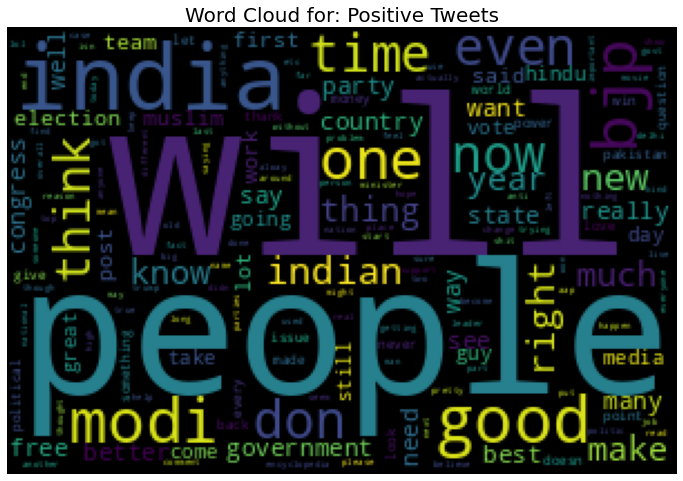

In [ ]:
plot_word_cloud(wc1,'Positive Tweets')

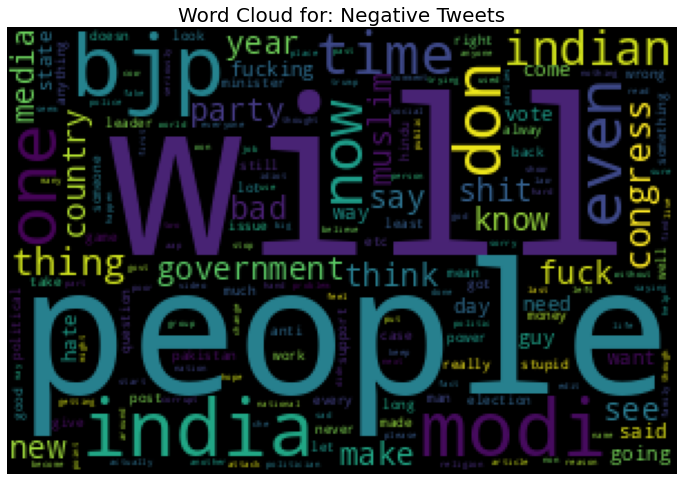

In [ ]:
plot_word_cloud(wc2,'Negative Tweets')

<BarContainer object of 37249 artists>

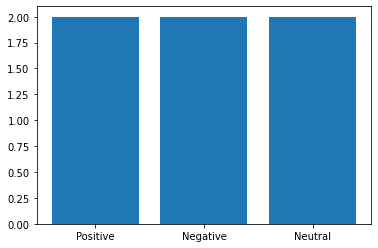

Text(0.5, 6.79999999999999, 'Tweet Category')

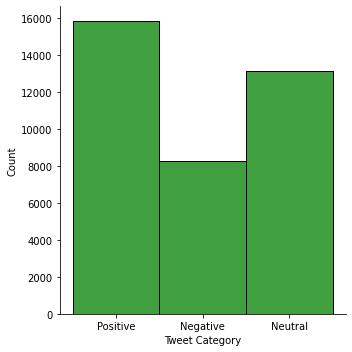

In [ ]:
import seaborn as sns
sns.displot(df1.category,color='green')
plt.xlabel('Tweet Category')

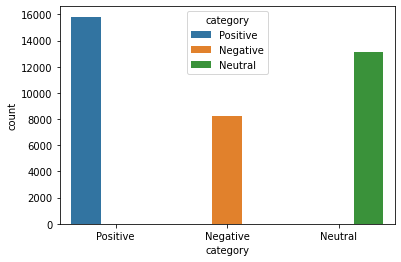

In [ ]:
sns.countplot(x='category',data=df1,hue='category')
plt.show()